<a href="https://colab.research.google.com/github/habtew/Predictive-Maintenance-Model/blob/main/ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, plot_confusion_matrix
# from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,plot_precision_recall_curve,precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
df=pd.read_csv('predictive_maintenance.csv')

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])

In [ ]:
encoded_results_1[0]

array([0, 1, 0, 0, 0, 0])

In [ ]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)

In [ ]:
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])

In [ ]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

In [ ]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)

In [ ]:
df1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [ ]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

In [ ]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [ ]:
df1.drop(["Type","Failure Type"], axis=1, inplace=True)

KeyError: "['Type', 'Failure Type'] not found in axis"

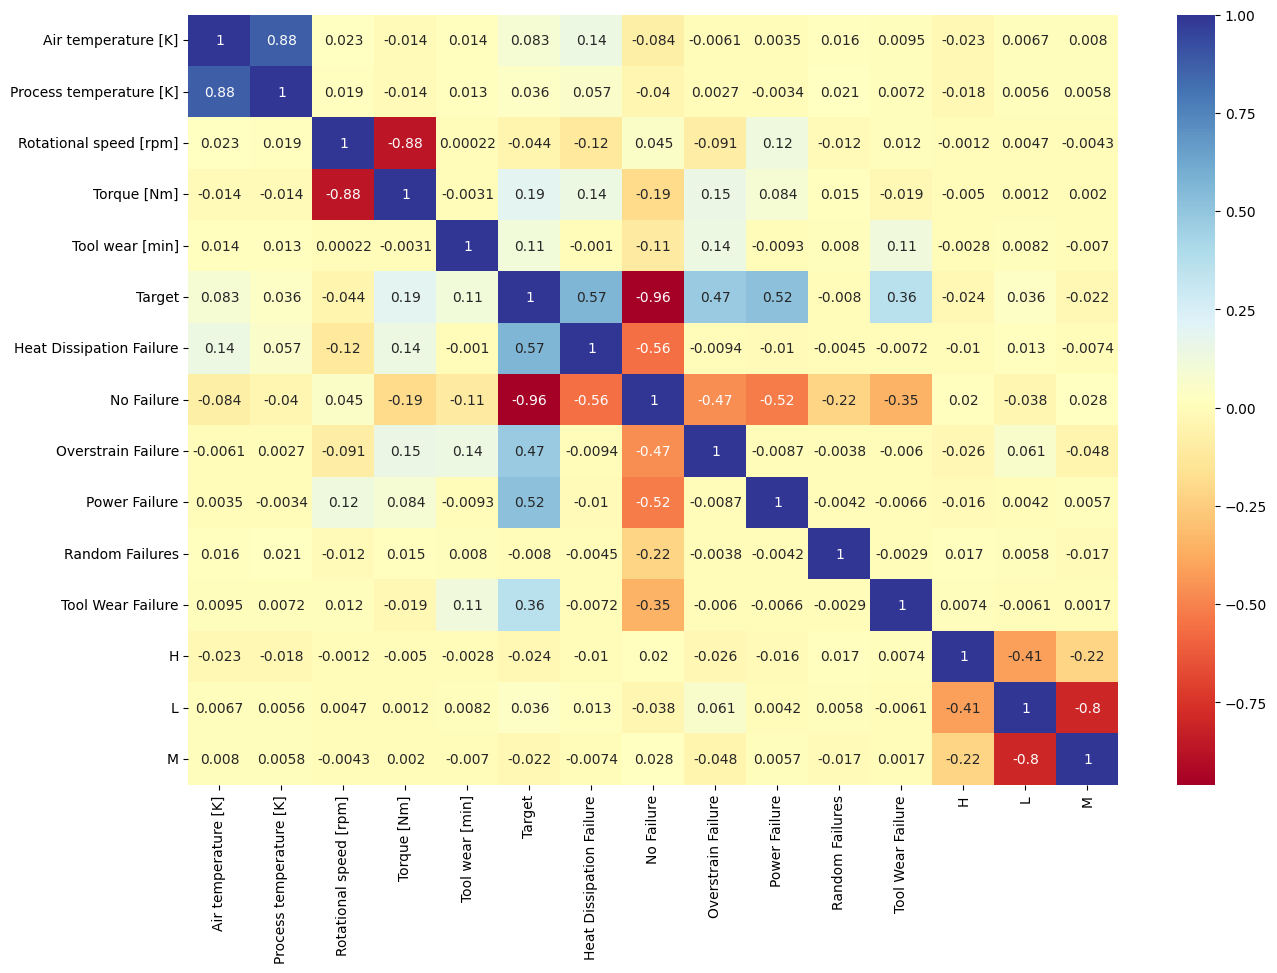

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [ ]:
df1.isnull().values.any()

False

In [ ]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [ ]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
DF.columns=DF.columns.astype("str")
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
col_name=DF.columns.to_list()
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [ ]:
DF = DF.reset_index(drop=True)
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [ ]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [ ]:
X_train.shape
X_test.shape

(3300, 8)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
from sklearn.multioutput import ClassifierChain

In [ ]:
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)

In [ ]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [ ]:
model_lgb_pred = chain_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 11, number of negative: 6689
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001642 -> initscore=-6.410324
[LightGBM] [Info] Start training from score -6.410324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
print(model_lgb_pred.score(X_test,y_test))

0.9857575757575757


In [ ]:
yhat_lgb = model_lgb_pred.predict(X_test)

In [ ]:
yhat_lgb.shape
count = 0
for i in range(len(yhat_lgb)):
  if yhat_lgb[i][5] == 1:
    count += 1
# print(yhat_lgb[0])
print(count)
count1  = 0
for i in range(len(y_test)):
  if y_test[i][5] == 1:
    count1 += 1
print(count1)

1
12
